<a href="https://colab.research.google.com/github/bhargavi5e1/bhargavi/blob/main/Stockpriceprediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                        1. Stock Prediction :
# Take stock price of any company you want and predicts its price by using LSTM.




In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset = pd.read_csv("/content/archive.zip")
print(len(dataset))

4431


In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [ ]:
print(dataset.columns.tolist())


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [ ]:
dataset_train=dataset.iloc[4000:-100]
dataset_test=dataset.iloc[-100:]

**dataset_train**





In [ ]:
trainset = dataset_train.iloc[:,1:2].values #Open
display(trainset[0:5])

array([[1513.25    ],
       [1549.939941],
       [1492.790039],
       [1523.22998 ],
       [1501.5     ]])

**MinMaxScaler**

In [ ]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))

[[0.07179821]
 [0.09562269]
 [0.0585126 ]
 [0.07827867]
 [0.06416838]]
331


In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(60,len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(271, 60) (271,)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print('(samples, time steps, features) =',x_train.shape)

(samples, time steps, features) = (271, 60, 1)


In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

regressor.fit(x_train,y_train,epochs =100, batch_size = 32)

Epoch 1/100
9/9 [==============================] - 11s 128ms/step - loss: 0.0077
Epoch 2/100
9/9 [==============================] - 1s 127ms/step - loss: 0.0052
Epoch 3/100
9/9 [==============================] - 1s 128ms/step - loss: 0.0047
Epoch 4/100
9/9 [==============================] - 1s 129ms/step - loss: 0.0049
Epoch 5/100
9/9 [==============================] - 1s 130ms/step - loss: 0.0049
Epoch 6/100
9/9 [==============================] - 1s 127ms/step - loss: 0.0046
Epoch 7/100
9/9 [==============================] - 1s 131ms/step - loss: 0.0047
Epoch 8/100
9/9 [==============================] - 1s 129ms/step - loss: 0.0044
Epoch 9/100
9/9 [==============================] - 2s 216ms/step - loss: 0.0047
Epoch 10/100
9/9 [==============================] - 2s 165ms/step - loss: 0.0044
Epoch 11/100
9/9 [==============================] - 1s 126ms/step - loss: 0.0047
Epoch 12/100
9/9 [==============================] - 1s 123ms/step - loss: 0.0041
Epoch 13/100
9/9 [==================

**dataset_test**

In [ ]:
real_stock_price = dataset_test.iloc[:,1:2].values

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)

In [ ]:
print(len(dataset_total),len(dataset_test))
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
print(inputs.shape)

431 100
(160,)


In [ ]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

#sc = MinMaxScaler(feature_range = (0,1))
inputs = sc.transform(inputs)
print(inputs.shape)

(160, 1)
(160, 1)


In [ ]:
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(100, 60)
(100, 60, 1)


In [ ]:
predicted_price = regressor.predict(x_test)

4/4 [==============================] - 2s 29ms/step


In [ ]:
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(100, 1)


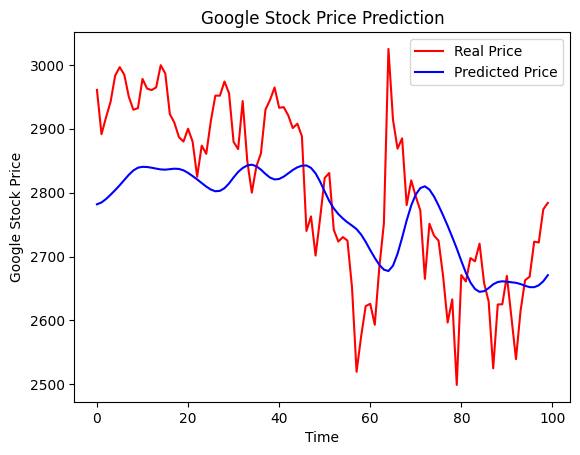

In [ ]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
inputs = np.array(dataset_train['Open'][-60:])
new_predicted_price=[]
for i in range(100):
    x = np.reshape(inputs, (1,60,1))
    pred = regressor.predict(x)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price+=[pred.reshape(-1)]

1/1 [==============================] - 0s 52ms/step


In [ ]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(100, 1)


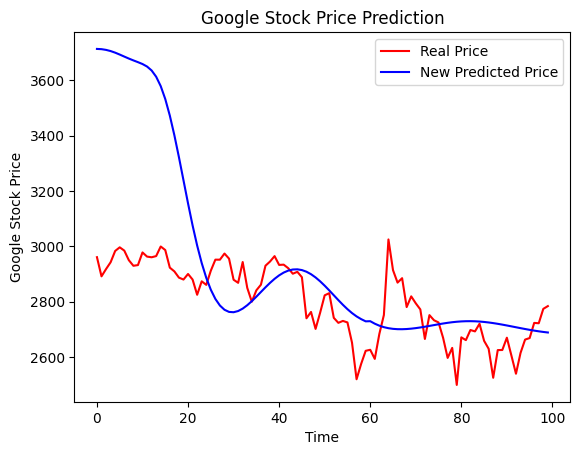

In [ ]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(new_predicted_price, color = 'blue', label = 'New Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()